In [44]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [45]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [46]:
df = pd.read_csv(r"C:\Users\Asus\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Minor-Project-Data-set-_Stock-Price-Prediction_-_1_.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_28976\2770484664.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(r"C:\Users\Asus\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Minor-Project-Data-set-_Stock-Price-Prediction_-_1_.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

In [47]:
print('Dataframe Shape:', df.shape)
print('Null Value Present:', df.isnull().values.any())


Dataframe Shape: (1009, 6)
Null Value Present: False


<Axes: xlabel='Date'>

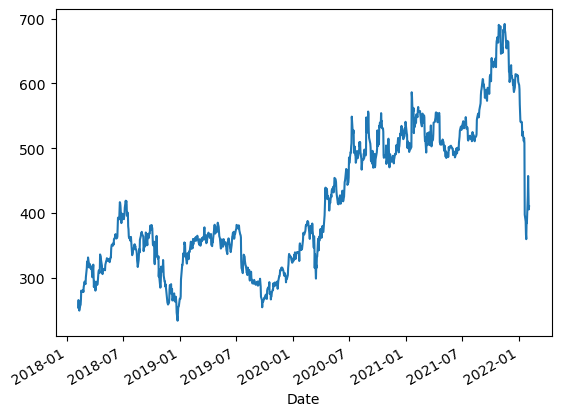

In [48]:
df['Adj Close'].plot()

In [49]:
#Set Target Variable
output_var = PD.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


In [50]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

Open      High       Low    Volume
Date                                              
2018-02-05  0.061253  0.038304  0.041331  0.186150
2018-02-06  0.030059  0.035640  0.030273  0.198264
2018-02-07  0.071243  0.048408  0.072770  0.135690
2018-02-08  0.072334  0.037683  0.041265  0.141320
2018-02-09  0.043474  0.011436  0.010729  0.272902

In [51]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [52]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [54]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer= 'adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 122021.9219
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121528.2031
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 120375.2109
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118241.4609
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 115009.9766
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110753.1562
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 105642.0312
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99871.1641
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93622.7734
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87056.1797
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80307.8516
Epoch 12/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73494.7578
Epoch 13/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [55]:
y_pred= lstm.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


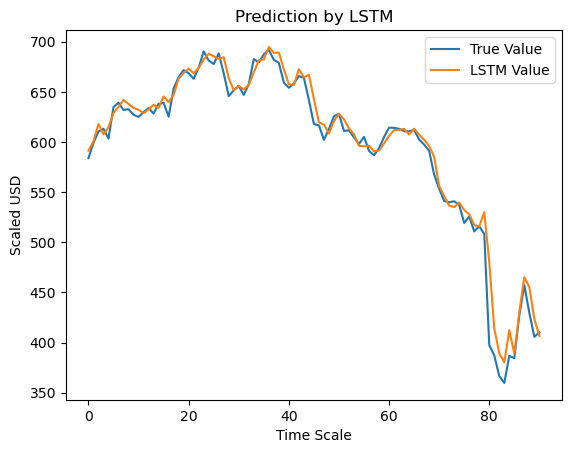

In [57]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()